<a href="https://colab.research.google.com/github/CarlosSMWolff/Quantum-Optics-Course/blob/main/1_Quantum_single_mode_field.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install necessary libraries

In Colab, we will need to install qutip into the machine.

In [1]:
! pip install qutip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 17.4 MB/s eta 0:00:00


Load libraries

In [12]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import cm
from matplotlib import colors

# Single-mode field: definitions of operators and basis states (Fock states)

When describing numerically the states of a harmonic oscillator, we must always make a first approximation: truncating the Hilbert space. Unfortunately, we cannot yet fit the infinite Hilbert space of the harmonic oscillator in our RAM memory, so we must choose a number of levels to be included in our description, which we define here as ```Ntrun```. 



In [41]:
Ntrun = 20

Now we can defined our annihilation operator in our truncated Hilbert space, using the Qutip command ```destroy```


In [42]:
a = destroy(Ntrun)

The basis in which operators are built is the basis of Fock states, i.e. the eigenstates of the free harmonic oscillator. We can use the command ```basis``` to create such states. Let's see an example creating


1.   The vacuum state, $|0\rangle$
2.   A state with exactly 3 photons, $|3\rangle$


In [43]:
vac = basis(Ntrun,0)
fock3 = basis(Ntrun,3)

Let us know compute some expectation values to check that we get the correct mean photon numbers, given by the expectation value of the operator $a^\dagger a$, which we define as ```a.dag()*a```. 

Notice that, in Qutip:

1.  Products of operators are done with the ```*``` operator.
2.  Conjugate transpose of an operator is obtained using the function ```.dag()```.



In [44]:
expect(a.dag()*a, vac)

0.0

In [45]:
expect(a.dag()*a, fock3)

2.9999999999999996

# Visualizations in phase space

We compute the Wigner function to visualize states in phase space

In [46]:
xvec = np.linspace(-5, 5, 500)
W_vacuum = wigner(vac, xvec, xvec, g=2)

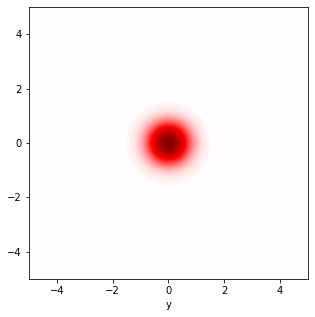

In [47]:
divnorm=colors.TwoSlopeNorm(vmin=-W_vacuum.max(), vcenter=0, vmax=W_vacuum.max())

#Plot the Wigner function
fig, ax = plt.subplots(figsize=(5,5))
ax.contourf(xvec, xvec, W_vacuum, 100, cmap="seismic", norm=divnorm)
ax.set_xlabel("x")
ax.set_xlabel("y")
plt.show()


# Coherent states

We can create a coherent state simply with the function ```coherent```

In [48]:
alpha = 2
psi_alpha = coherent(Ntrun, alpha)

Let's visualize this state in phase space.

WARNING: We need to call ```wigner()``` with parameter ```g=2``` to be consistent with our definition of quadratures, which is 

$$ x \equiv \frac{1}{2}(a + a^\dagger) $$

In [49]:
W_coherent= wigner(psi_alpha, xvec, xvec, g= 2)

Let us build a function that we will use to visualize the states

In [50]:
def plot_state(psi,wigner, xvec,yvec=None):
  if yvec==None:
    yvec=xvec
  
  divnorm=colors.TwoSlopeNorm(vmin=-wigner.max(), vcenter=0, vmax=wigner.max())
  fig, axis = plt.subplots(ncols=2,figsize=(14,5))
  ax=axis[0]

  #Plot the Wigner function
  im = ax.contourf(xvec, xvec, wigner, 100,cmap="seismic", norm=divnorm)
  fig.colorbar(im, ax=ax)
  ax.set_xlabel("x")
  ax.set_ylabel("y")
  ax.set_box_aspect(1)

  #Plot the photon number probability
  ax=axis[1]
  ax.plot(np.abs(psi.full())**2,'-o')
  ax.set_xlabel("n")
  ax.set_ylabel("p(n)")

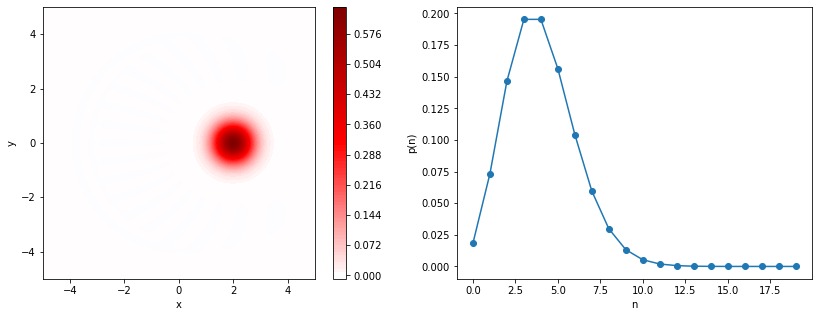

In [51]:
plot_state(psi_alpha,W_coherent,xvec)

We can also create these states by using the displacement operator

In [52]:
D = displace(Ntrun, alpha)
psi_alpha = D*vac 

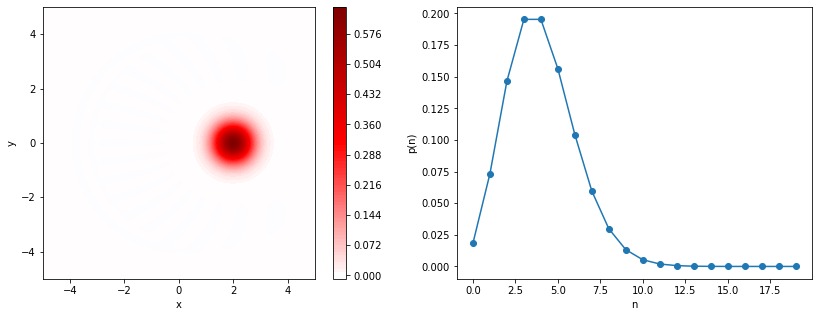

In [53]:
W_coherent= wigner(psi_alpha, xvec, xvec, g= 2)
plot_state(psi_alpha,W_coherent,xvec)

# Fock states

Let us see now Wigner functions of Fock states, which are non-classical states with a well-defined number of photons

Fock state 1

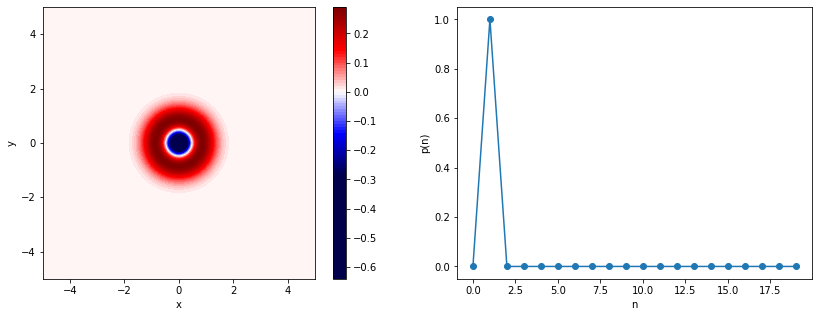

In [54]:
psi = basis(Ntrun,1)
Wigner = wigner(psi, xvec, xvec, g= 2)

plot_state(psi,Wigner,xvec)

Fock state 4

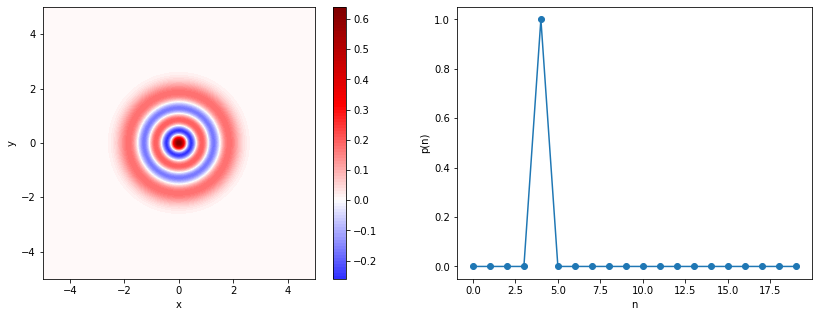

In [55]:
psi = basis(Ntrun,4)
Wigner = wigner(psi, xvec, xvec, g= 2)

plot_state(psi,Wigner,xvec)

\Notice something very important: the Wigner function has now **negative values**!! This signals that we have a non-classical state.

# Other classical states: Cat States

Now we are ready to build and see some of the most paradigmatic non-classical states:  **Schrodinger cat states**.

The idea of a cat state is to build a superposition of classical objects, like the cat in Schrodinger's gedanken experiment. We already know that the most classical state of the HO is the coherent state, therefore, cat states are builts as **superpositions of coherent states in opposite locations of phase space.**

Let's see how these states look like in phase space.

In order to build the superposition, we sum two coherent states with opposite phase (i.e., given by $\alpha$ and $-\alpha$), and use the function ```unit()``` on the sum to normalize it (do not forget that step!), so that:

$$ |C_+\rangle = \frac{1}{N}(|\alpha\rangle + |-\alpha\rangle) $$

where $N$ is the normalization constant.

In [58]:
alpha = 2.4
alphaPlus = coherent(Ntrun,alpha)
alphaMinus = coherent(Ntrun,-alpha)

catPlus = (alphaPlus + alphaMinus).unit()

Let's see this state in phase space

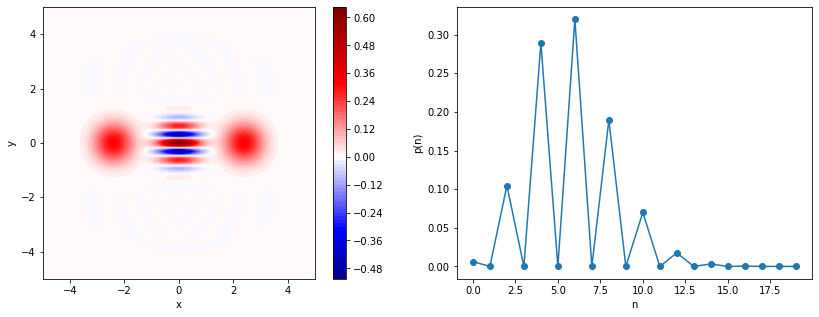

In [59]:
WignercatPlus = wigner(catPlus, xvec, xvec, g= 2)

plot_state(catPlus,WignercatPlus,xvec)

Some observations:
1.   Negative Wigner function: the coherent superposition manifests as interference fringes in phase space taking negative values.
2.   Only even photon number components in the wavefunction.

Let us see now the superposition $$ |C_-\rangle = \frac{1}{N}(|\alpha\rangle - |-\alpha\rangle) $$





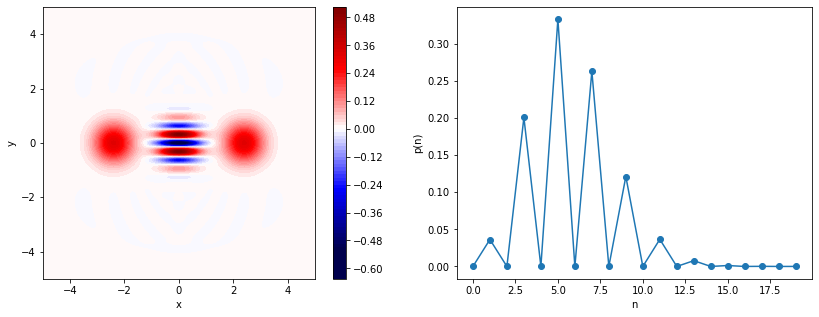

In [61]:
catMinus = (alphaPlus - alphaMinus).unit()
WignercatMinus = wigner(catMinus, xvec, xvec, g= 2)
plot_state(catMinus,WignercatMinus,xvec)

Notice that
1.   Interference fringes changed sign.
2.   Now only even photon numbers contribute.

These two type of states are orthogonal between each other. These states are one of the proposals for qubits in quantum computing with continuous variables. This is, for instance, the approach followed by the startup Alice & Bob:

[Alice & Bob](https://alice-bob.com/)

# Squeezed states

Let us now visualize a squeezed state

In [70]:
r = 0.7
phi = np.pi

# Create squeezing operator
S = squeeze(Ntrun, r*np.exp(1j*phi))

# Apply squeezing operator
psiSq = S*vac

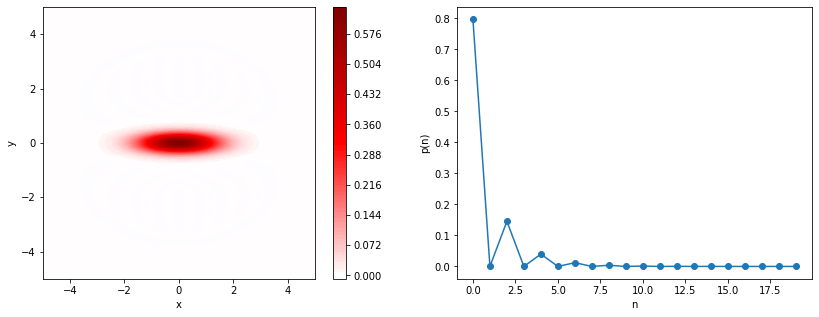

In [71]:
WignerSq = wigner(psiSq, xvec, xvec, g= 2)

plot_state(psiSq,WignerSq,xvec)

# Thermal states

In [74]:
nth = 3.
rhoThermal = thermal_dm(Ntrun, nth)
WignerTh = wigner(rhoThermal, xvec, xvec, g= 2)

In [76]:
def plot_dm(rho,wigner, xvec,yvec=None):
  if yvec==None:
    yvec=xvec
  
  divnorm=colors.TwoSlopeNorm(vmin=-wigner.max(), vcenter=0, vmax=wigner.max())
  fig, axis = plt.subplots(ncols=2,figsize=(14,5))
  ax=axis[0]

  #Plot the Wigner function
  im = ax.contourf(xvec, xvec, wigner, 100,cmap="seismic", norm=divnorm)
  fig.colorbar(im, ax=ax)
  ax.set_xlabel("x")
  ax.set_ylabel("y")
  ax.set_box_aspect(1)

  #Plot the photon number probability
  ax=axis[1]
  ax.plot(np.abs(rho.diag()),'-o')
  ax.set_xlabel("n")
  ax.set_ylabel("p(n)")

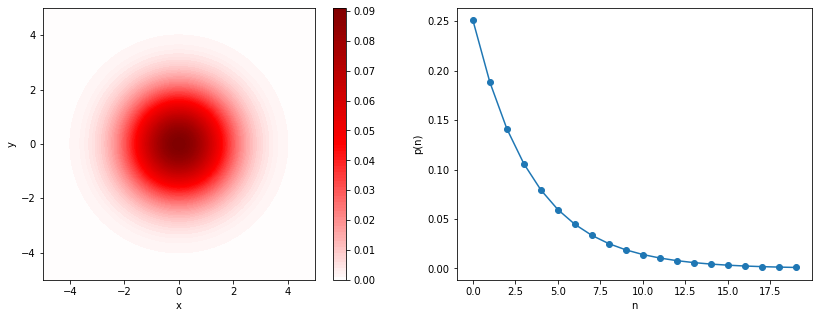

In [77]:
plot_dm(rhoThermal,WignerTh,xvec)

# Playground

Why don't you try to come up with new states that no one has ever seen? Define them and plot them below!